In [79]:
#AMazon ALexa Review

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shett\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [84]:
#data import
data = pd.read_csv(r"C:\Users\shett\Downloads\amazon_alexa.tsv", delimiter='\t', quoting=3)


In [85]:
data.shape

(3150, 5)

In [86]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [87]:
#columns names
datafeature = data.columns.values
print(datafeature)

['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [88]:
#check null value
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [89]:
#check which value is null
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [90]:
#drop null values
data.dropna(inplace=True)

In [91]:
#creating new col length to calculate length of review
data['length'] = data['verified_reviews'].apply(len)
print(data.head())


   rating       date  ... feedback length
0       5  31-Jul-18  ...        1     13
1       5  31-Jul-18  ...        1      9
2       4  31-Jul-18  ...        1    197
3       5  31-Jul-18  ...        1    174
4       5  31-Jul-18  ...        1      5

[5 rows x 6 columns]


In [92]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [93]:
#checking datatypes
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [94]:
#distict value of rating
print(f"Rating value count :\n {data['rating'].value_counts()}")

Rating value count :
 rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


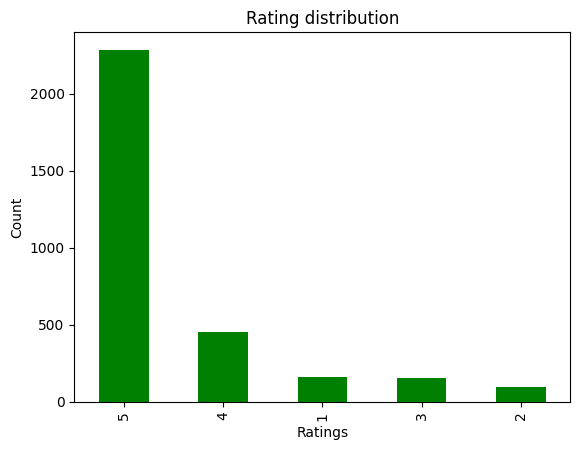

In [95]:
#plotting bar graph
data['rating'].value_counts().plot.bar(color ='green')
plt.title('Rating distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

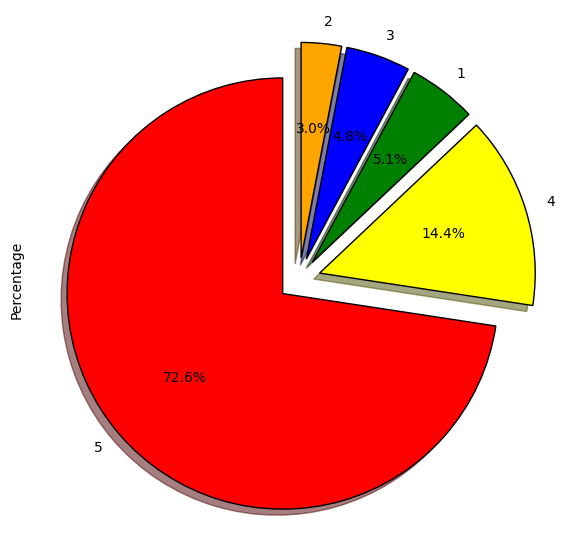

In [96]:
#above with pie chart
fig = plt.figure(figsize=(7,7))
colors = ('red','yellow','green','blue','orange')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow = True , colors= colors, startangle=90, wedgeprops =wp, explode= explode, label= "Percentage")
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [97]:
#Analyzing feedback column
print(f"Feedback value : \n {data['feedback'].value_counts()}")

Feedback value : 
 feedback
1    2893
0     256
Name: count, dtype: int64


In [98]:
data['feedback'].shape

(3149,)

In [99]:
data['feedback'].shape

(3149,)

In [100]:
##extracting verified reviews with feedback = 0
review_0 = data[data['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [101]:
review_1 = data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


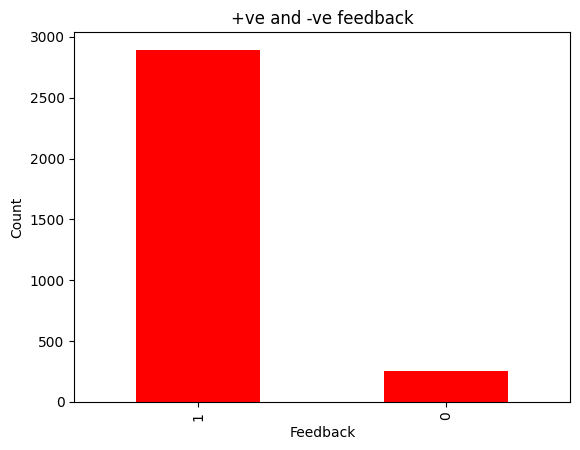

In [102]:
#plot for whole feedback where 1= +ve and 0= -ve
data['feedback'].value_counts().plot.bar(color="red")
plt.title("+ve and -ve feedback")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.show()

In [103]:

#length;
data['length'].value_counts()

length
1      81
11     48
13     44
8      41
22     36
       ..
400     1
198     1
397     1
582     1
401     1
Name: count, Length: 495, dtype: int64

In [104]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Length')]

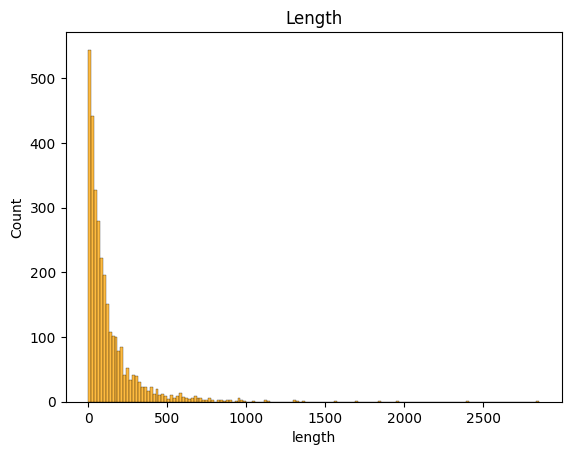

In [105]:
sns.histplot(data['length'], color = "orange").set(title='Length')

In [106]:
#COunt vectorizer
cv = CountVectorizer(stop_words='english')
words= cv.fit_transform(data.verified_reviews)

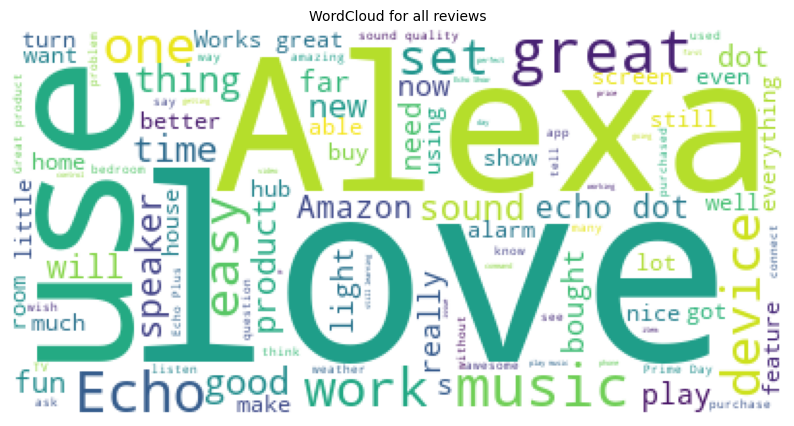

In [107]:
#wordcloud
reviews = " ".join([review for review in data['verified_reviews']])

wc = WordCloud(background_color='white', max_words=100)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title("WordCloud for all reviews", fontsize=10)
plt.axis('off')
plt.show()

In [108]:
data.shape[0]

3149

In [109]:
#Preprocessing Model
#PorterStemmer algo for stemming

corpous = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]',' ',data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpous.append(review)

In [110]:
#using count vector to create bag of words
cv = CountVectorizer(max_features = 2500)

#storing indep and dep variables to x and y
X = cv.fit_transform(corpous).toarray()
y = data['feedback'].values

In [111]:
#saving the count vectorizer
pickle.dump(cv, open("Models/countVectorizer.pkl",'wb'))

In [112]:
#shape of x and y
print(f"X shape:{X.shape}")
print(f"y shape : {y.shape}")

X shape:(3149, 2500)
y shape : (3149,)


In [122]:
#splitting 70 test 30 train

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

print(f"X train : {X_train.shape}")
print(f"y train : {y_train.shape}")
print(f"X test : {X_test.shape}")
print(f"y test : {y_test.shape}")

X train : (2204, 2500)
y train : (2204,)
X test : (945, 2500)
y test : (945,)


In [123]:
#scale X_train and X_Test so tht all values ate btwn 0 and 1
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [124]:
#saving model
pickle.dump(scaler, open("Models/scaler.pkl", 'wb'))

In [125]:
# Random Forest

#fitting x and y to random forst
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [126]:
#accuracy of the model
print("Training accuracy:", model_rf.score(X_train_scl, y_train))
print("Testing accuracy:", model_rf.score(X_test_scl, y_test))

Training accuracy: 0.9945553539019963
Testing accuracy: 0.9417989417989417


In [127]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [128]:
cm = confusion_matrix(y_test, y_preds)

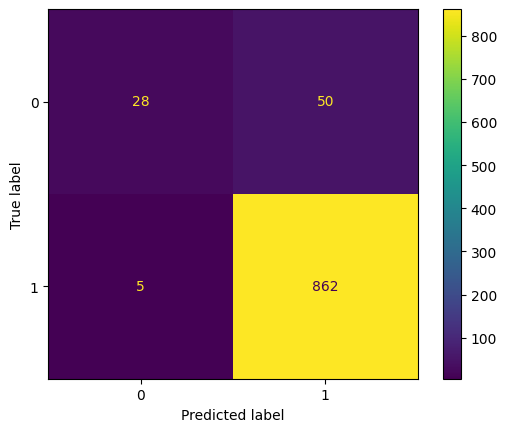

In [129]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [131]:

#saving file
pickle.dump(model_rf, open("Models/random_forest.pkl",'wb'))